# Exercises for linear regression

In [55]:
## importing necessary packages
import numpy as np
import pandas as pd
import scipy.stats as scs
import seaborn as sns
import matplotlib.pyplot as plt


## Exercise 0

,X,y
0,23.599881,76.788411
1,31.806457,103.047846
2,169.528876,209.877070
3,81.221313,205.343155
4,33.123638,16.147549
...,...,...
395,13.839123,28.920756
396,154.558480,396.242886
397,103.745103,259.385332
398,62.356114,197.914765


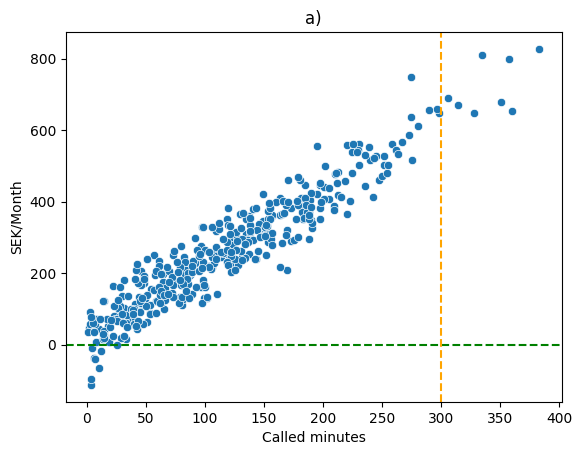

In [56]:
## a) 

seed =  42

# Generate simulated data
x = np.random.normal(100,100, 400)
x = np.absolute(x)
# Generate 
E = np.random.normal(0, 50, 400)

data = {"X" : x, "y": (x*2 + 25 + E)}
df  = pd.DataFrame(data)

display(df)
ax = sns.scatterplot(df, y="y", x="X")
ax.set(title="a)", ylabel="SEK/Month", xlabel="Called minutes")

ax = plt.axhline(0, color="green", linestyle= "dashed")
ax = plt.axvline(300, color="orange", linestyle= "dashed")

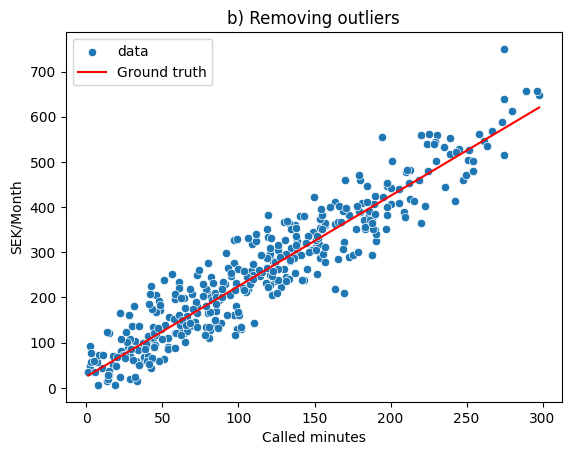

In [57]:
## b) 


## Dropping negative costs.
df.drop(df.loc[df["y"] < 0].index, inplace=True)

## Drop every call over 300 min
df.drop(df.loc[df["X"] > 300].index, inplace=True)

## Plot the new plot
ax = sns.scatterplot(df, x="X", y = "y", label="data")
ax.set(title="b) Removing outliers", ylabel="SEK/Month", xlabel="Called minutes")



## Calculate y_hat with given values for B1,B0
beta_0 = 25
beta_1 = 2
y_hat = lambda x: beta_0 + beta_1*x
ax = sns.lineplot(df, x="X", y=y_hat(df["X"]), color="red", label="Ground truth")


In [58]:
## X = Minutes, Y = Cost in SEK/Month
df.head()
df["X"]

0       23.599881
1       31.806457
2      169.528876
3       81.221313
4       33.123638
          ...    
395     13.839123
396    154.558480
397    103.745103
398     62.356114
399    101.554321
Name: X, Length: 384, dtype: float64

##  1.  Train, test split


In [59]:
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction= 0.7, random_state=42, replace=False):
    
    X_train = X.sample(n=int(len(X)*train_fraction), random_state=random_state, replace=replace)
    X_test = X.drop(X_train.index)

    y_train = y.sample(n=int(len(y)*train_fraction), random_state=random_state, replace=replace)
    y_test = y.drop(y_train.index)


    return(X_train, X_test, y_train, y_test)
    

X_tr, X_te, y_tr, y_te = train_test_split(df["X"], df["y"])


print(X_tr.shape, X_te.shape, y_tr.shape, y_te.shape)


(268,) (116,) (268,) (116,)


## 2. Simple linear regression with normal equation

23.859127631636635 2.0282118264604816 34.84221761870782 1.9482920129992014


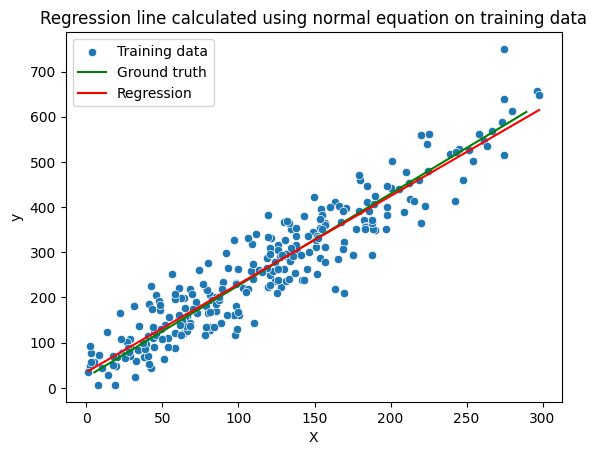

In [60]:
ax = sns.scatterplot(x=X_tr, y=y_tr, label="Training data")
ax.set_title("Regression line calculated using normal equation on training data")

beta_1, beta_0 = np.polyfit(X_te,y_te, deg=1)

def test_y_hat(x):
    return beta_0 + beta_1*x



## Ground truth with test data
ax = sns.lineplot(x=X_te, y=test_y_hat(X_te), color="green", label="Ground truth")


# Regression line with training data
X_tr = np.array(X_tr)
y_tr = np.array(y_tr)

beta_1_tr, beta_0_tr  = np.polyfit(X_tr, y_tr, deg=1)

def beta_hat_tr(x):
    return beta_0_tr + beta_1_tr*x

ax = sns.lineplot(x=X_tr, y=beta_hat_tr(X_tr), color="Red", label="Regression")

print(beta_0, beta_1, beta_0_tr, beta_1_tr)

## 3. Prediction and evaluation

(39.182031385693186, 2374.8169940753182, 48.73209408670346)

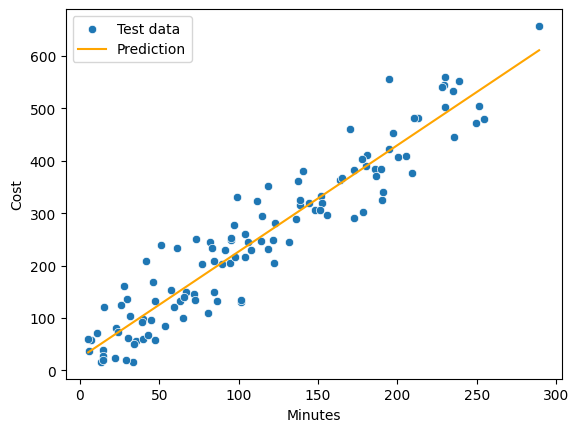

In [61]:
ax = sns.scatterplot(x=X_te, y=y_te, label="Test data")
y_pred = test_y_hat(X_te)

ax = sns.lineplot(x=X_te, y=y_pred, color="Orange", label="Prediction")
ax.set(ylabel="Cost", xlabel="Minutes")

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)

mae, mse, rmse

## 4. More variables
Adding mean start cost(25kr), mean sms cost(50öre), surf/GB(50kr), per/minute(2kr)  

$y = 25 + 2x_1 + 0.5x_2 + 50x_3 + \epsilon$

In [73]:
# Mean costs
start_cost = 25
cost_per_minute = 2 # x1
cost_per_text =  0.5 # x2
cost_per_gb = 50 # x3

x1 = np.abs(np.random.normal(100,100,10000))
x2 = np.random.randint(0,50,10000)
x3 = np.abs(np.random.normal(0,2,10000))
E = np.random.normal(0,50, 10000)

df = pd.DataFrame({
    "Minutes" : x1, "SMS":x2, "GB":x3, "E":E
})

# y = lambda x , y, z, e: 25 + 2*x +  0.5*y + 50*z + e
# df.insert(0,"Y", y(df["X1"], df["X2"], df["X3"], df["E"]))
df.insert(0,"Cost", (25 + 2*df["Minutes"]+ 0.5*df["SMS"] + 50*df["GB"] + df["E"]))
df.insert(0, "Intercept", 1)

df = df.drop(["E"], axis="columns")
df.info()
display(df.head())
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Intercept  10000 non-null  int64  
 1   Cost       10000 non-null  float64
 2   Minutes    10000 non-null  float64
 3   SMS        10000 non-null  int32  
 4   GB         10000 non-null  float64
dtypes: float64(3), int32(1), int64(1)
memory usage: 351.7 KB


,Intercept,Cost,Minutes,SMS,GB
0,1,533.845483,217.216189,29,0.188233
1,1,63.109673,3.022397,35,0.604919
2,1,112.095985,31.028391,9,1.150795
3,1,270.943689,89.141466,3,0.331439
4,1,358.734800,97.016408,48,2.126087


,Intercept,Cost,Minutes,SMS,GB
9995,1,279.068341,99.999063,18,0.424014
9996,1,350.021510,107.655106,47,0.703008
9997,1,548.334086,219.040499,13,1.068163
9998,1,385.399714,158.682568,38,0.858192
9999,1,478.028678,193.619707,39,0.628717


<Axes: xlabel='Cost', ylabel='Count'>

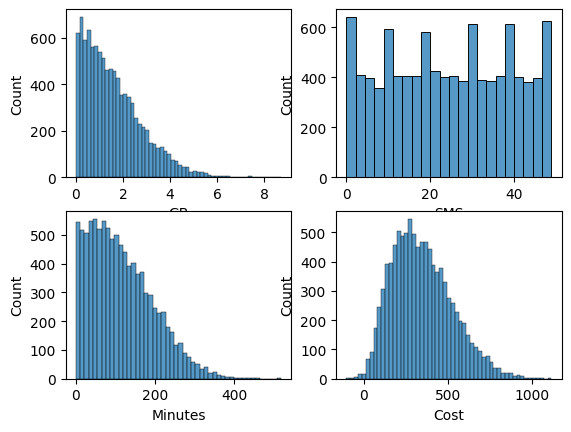

In [101]:
plot_cols = df.columns[1:-1]

fig, axs = plt.subplots(2,2)

sns.histplot(df["GB"], ax=axs[0,0])
sns.histplot(df["SMS"], ax=axs[0,1])
sns.histplot(df["Minutes"], ax=axs[1,0])
sns.histplot(df["Cost"], ax=axs[1,1])



In [102]:
df1 = df.query("Cost > 0" and "GB < 4" and "Minutes < 300")
df1

,Intercept,Cost,Minutes,SMS,GB
0,1,533.845483,217.216189,29,0.188233
1,1,63.109673,3.022397,35,0.604919
2,1,112.095985,31.028391,9,1.150795
3,1,270.943689,89.141466,3,0.331439
4,1,358.734800,97.016408,48,2.126087
...,...,...,...,...,...
9995,1,279.068341,99.999063,18,0.424014
9996,1,350.021510,107.655106,47,0.703008
9997,1,548.334086,219.040499,13,1.068163
9998,1,385.399714,158.682568,38,0.858192


<Axes: xlabel='Cost', ylabel='Count'>

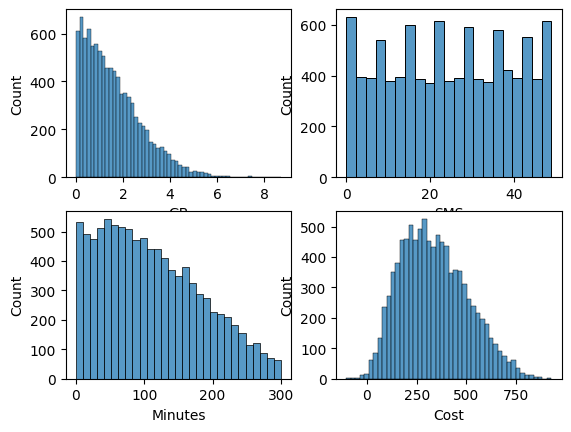

In [103]:
fig, axs = plt.subplots(2,2)

sns.histplot(df1["GB"], ax=axs[0,0])
sns.histplot(df1["SMS"], ax=axs[0,1])
sns.histplot(df1["Minutes"], ax=axs[1,0])
sns.histplot(df1["Cost"], ax=axs[1,1])